Largest Lyapunov Exponent:  -0.007970486860364005


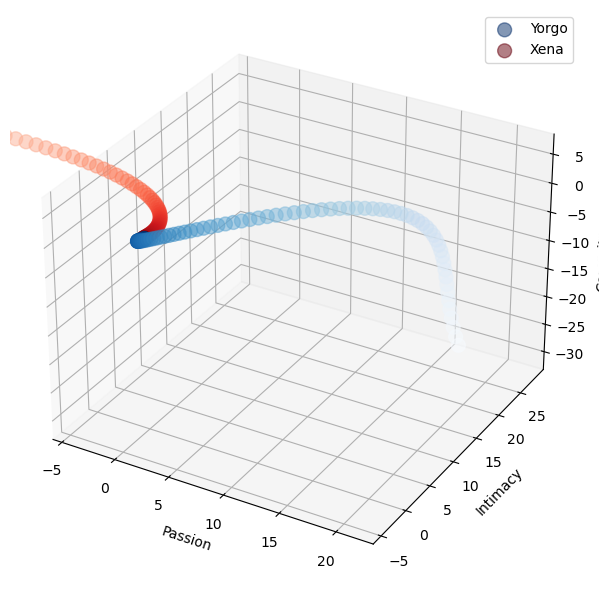

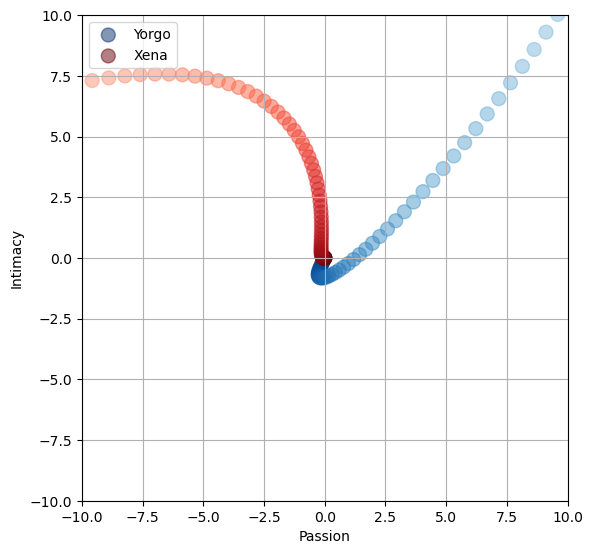

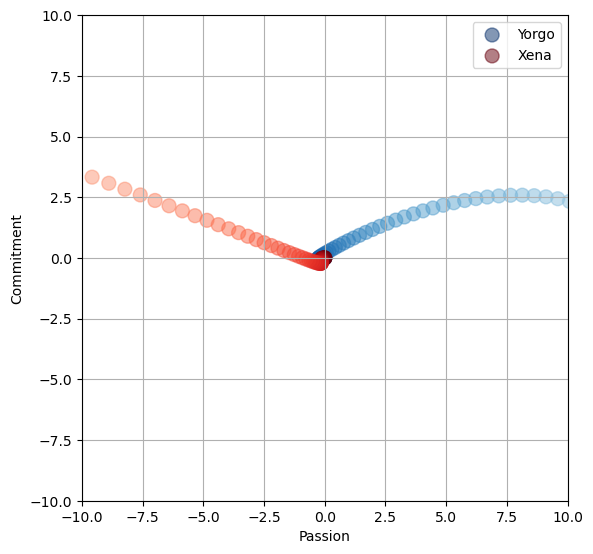

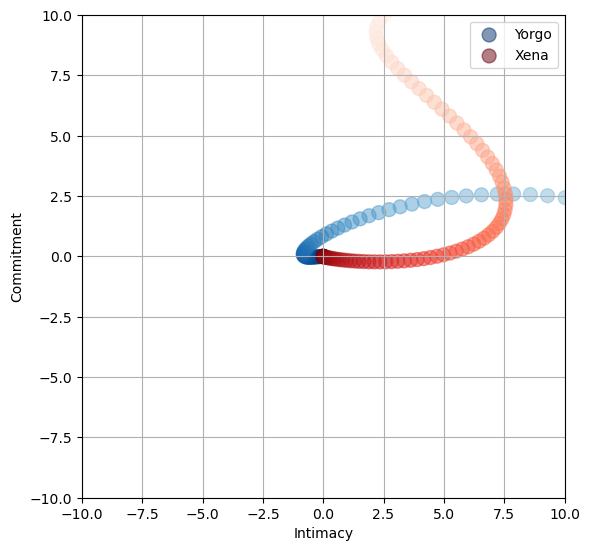

In [34]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import pickle
import plotly.graph_objects as go
random.seed(0)
num = 0


def calculateODE(initial_conditions, params):
    A = np.array([[axx, axy, bxx, bxy, lxx, lxy],
                  [ayx, ayy, byx, byy, lyx, lyy],
                  [cxx, cxy, dxx, dxy, nxx, nxy],
                  [cyx, cyy, dyx, dyy, nyx, nyy],
                  [mxx, mxy, oxx, oxy, pxx, pxy],
                  [myx, myy, oyx, oyy, pyx, pyy]])
    B = np.array([fxy, fyx, gxy, gyx, hxy, hyx])
    vdp1 = lambda T, x: A.dot(x) + B
    sol = solve_ivp(vdp1, [0, 8], np.array([xi0, yi0, xp0, yp0, xc0, yc0]), max_step=0.1)
    return sol


def largest_lyapunov_exponent(initial_conditions, params, delta=0.0001, T=208, dt=0.02):
    t = np.arange(0, T, dt)
    n = len(t)

    # Compute trajectories
    sol1 = calculateODE(initial_conditions, params)
    perturbed_initial = initial_conditions + np.random.normal(0, delta, len(initial_conditions))
    sol2 = calculateODE(perturbed_initial, params)

    # Calculate divergence
    divergence = np.linalg.norm(sol2.y - sol1.y, axis=1)

    # Avoid divide by zero in log: add a small constant or filter out zeros
    epsilon = 1e-10  # Small constant to avoid log(0)
    divergence = np.maximum(divergence, epsilon)

    # Compute Lyapunov Exponent
    lyapunov = 1/n * np.sum(np.log(divergence/delta))

    return lyapunov


def update_plot():
    sol = calculateODE(initial_conditions, params)
    [t, xa] = [sol.t, sol.y]

    # Save each plot separately
    # 3D plot
    fig1 = plt.figure(figsize=(6, 6))
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.scatter(xa[2], xa[0], xa[4], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax1.scatter(xa[3], xa[1], xa[5], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax1.set_xlabel('Passion')
    ax1.set_ylabel('Intimacy')
    ax1.set_zlabel('Commitment')
    ax1.legend()
        # Set wider limits for the axes to "zoom out"
    ax1.set_xlim([min(xa[2])-5, max(xa[2])+5])
    ax1.set_ylim([min(xa[0])-5, max(xa[0])+5])
    ax1.set_zlim([min(xa[4])-5, max(xa[4])+5])
    plt.tight_layout()
    plt.savefig('plots/love_3d.png', dpi=500)

    # XY Projection
    fig2 = plt.figure(figsize=(6, 6))
    ax2 = fig2.add_subplot(111)
    ax2.scatter(xa[2], xa[0], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax2.scatter(xa[3], xa[1], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax2.set_xlabel('Passion')
    ax2.set_ylabel('Intimacy')
    ax2.set_xlim([-10, 10])
    ax2.set_ylim([-10, 10])
    ax2.grid()
    ax2.legend()
    ax2.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig('plots/love_xy.png', dpi=500)

    # XZ Projection
    fig3 = plt.figure(figsize=(6, 6))
    ax3 = fig3.add_subplot(111)
    ax3.scatter(xa[2], xa[4], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax3.scatter(xa[3], xa[5], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax3.set_xlabel('Passion')
    ax3.set_ylabel('Commitment')
    ax3.set_xlim([-10, 10])
    ax3.set_ylim([-10, 10])
    ax3.grid()
    ax3.legend()
    ax3.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig('plots/love_xz.png', dpi=500)

    # YZ Projection
    fig4 = plt.figure(figsize=(6, 6))
    ax4 = fig4.add_subplot(111)
    ax4.scatter(xa[0], xa[4], s=100, cmap='Blues_r', alpha=0.5, label="Yorgo", c=t)
    ax4.scatter(xa[1], xa[5], s=100, cmap='Reds_r', alpha=0.5, label="Xena", c=t)
    ax4.set_xlabel('Intimacy')
    ax4.set_ylabel('Commitment')
    ax4.set_xlim([-10, 10])
    ax4.set_ylim([-10, 10])
    ax4.grid()
    ax4.legend()
    ax4.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.savefig('plots/love_yz.png', dpi=500)

    plt.tight_layout()
    plt.show()


def update_plotly():
    sol = calculateODE(initial_conditions, params)
    [t, xa] = [sol.t, sol.y]

    # 3D plot using Plotly
    fig = go.Figure()

    # Adding trace for Yorgo
    fig.add_trace(go.Scatter3d(
        x=xa[2], y=xa[0], z=xa[4],
        mode='markers',
        marker=dict(size=5, color='blue', opacity=0.5),
        name="Yorgo"
    ))

    # Adding trace for Xena
    fig.add_trace(go.Scatter3d(
        x=xa[3], y=xa[1], z=xa[5],
        mode='markers',
        marker=dict(size=5, color='red', opacity=0.5),
        name="Xena"
    ))

    # Setting labels and limits
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='Passion', range=[-10, 10]),
            yaxis=dict(title='Intimacy', range=[-10, 10]),
            zaxis=dict(title='Commitment', range=[-10, 10])
        ),
        margin=dict(r=10, l=10, b=10, t=10)
    )

    fig.show()

# Parameters
# Intimacy and Passion Dynamics for Xena
axx = -0.38  # Forgetting coefficient of the intimacy of Xena to Yorgo.
axy = 0.4  # If Yorgo’s intimacy increases, Xena’s will decrease, and if it decreases, it will increase.
bxx = +0.8  # If Xena’s passion increases, her sense of intimacy increases, and if it decreases, it decreases.
bxy = 0.0  # As Yorgo’s passion for Xena increase, Xena’s closeness to Yorgo decreases.
cxx = +0.1  # Her passion increase when Xena feels close. Men with whom she does not feel close are not attractive.
cxy = +0.93  # Intimate men are very attractive to Xena. Her passion for men who do not behave closely is significantly reduced.
dxx = -0.05  # Forgetting coefficient of the passion of Xena for Yorgo.
dxy = +0.4  # As Yorgo’s passion grows, so does Xena’s. A man who acts romantic may attract her.

# Intimacy and Passion Dynamics for Yorgo
ayy = 0.9  # Forgetting coefficient of the intimacy of Yorgo to Xena.
ayx = -0.7  # If Yorgo’s intimacy increases, Xena’s will decrease, if it decreases, it will increase.
byy = -0.9  # If Yorgo’s passion increases, his sense of intimacy decreases, and if it decreases, it increases.
byx = -0.6  # As Xena’s passion for Yorgo increases, Yorgo’s intimacy with Xena increases.
cyy = 0.1  # His passion decreases when Yorgo feels close. Women with whom he does not feel close are attractive.
cyx = -0.1  # Intimate women are not attractive to Yorgo. His passion for women who are close to him weakens a little.
dyy = -0.3  # Forgetting coefficient of the passion of Yorgo to Xena.
dyx = -0.8  # Effect of Xena's passion on Yorgo's passion. As Xena’s passion increases, Yorgo’s decreases.

# Impression coefficients
fxy = -0.7  # Xena’s impression of intimacy or friendship with Yorgo. She finds Yorgo intimate and friendly.
gyx = -0.34  # Yorgo’s impression of glamourousness or attractiveness about Xena. He finds Xena attractive and desires her romantically and sexually.
fyx = -0.1  # Yorgo’s impression of intimacy or friendship with Xena. Yorgo found Xena neither sympathetic nor antipathetic.
gxy = -0.3  # Xena’s impression of glamourousness or attractiveness about Yorgo. She does not find Yorgo romantically or sexually attractive.
hxy = +0.0  # Xena's impression of commitment to Yorgo. She does not find Yorgo committed to her.
hyx = +0.0  # Yorgo's impression of commitment to Xena. He does not find Xena committed to him.


# Commitment Dynamics
lxx = 0.3  # Influence of Xena's commitment on her own intimacy. She's more intimate with Yorgo because she's committed to him.
lxy = 0.2  # Influence of Yorgo's commitment on Xena's intimacy. She is more intimate with Yorgo because he is committed to her.
lyy = 0.1  # Influence of Yorgo's commitment on his own intimacy. He is more intimate with Xena because he is committed to her.
lyx = 0.1  # Influence of Xena's commitment on Yorgo's intimacy. The more she is committed to him, the more intimate he is with her.

mxx = 0.1  # Influence of Xena's intimacy on her own commitment. She is committed to Yorgo because she feels close to him.
mxy = 0.5  # Influence of Yorgo's intimacy on Xena's commitment. She is committed to Yorgo because he feels close to her.
myy = 0.0  # Influence of Yorgo's intimacy on his own commitment. His intimacy does not affect his commitment.
myx = 0.1  # Influence of Xena's intimacy on Yorgo's commitment. Her intimacy makes him slightly more committed to her.

nxx = -0.3  # Influence of Xena's commitment on her own passion. The more she is committed to Yorgo, the less passionate she is about him.
nxy = 0.4  # Influence of Yorgo's commitment on Xena's passion. The more he is committed to her, the more passionate she is about him.
nyy = 0.1  # Influence of Yorgo's commitment on his own passion. The more he is committed to Xena, the more passionate he is about her.
nyx = 0.2  # Influence of Xena's commitment on Yorgo's passion. The more she is committed to him, the more passionate he is about her.

oxx = -0.1  # Influence of Xena's passion on her own commitment. Her own passion scares her away.
oxy = 0.7  # Influence of Yorgo's passion on Xena's commitment. Yorgo's passion makes her more committed to him.
oyy = 0.2  # Influence of Yorgo's passion on his own commitment. The more he is passionate about Xena, the more committed he is to her.
oyx = 0.3  # Influence of Xena's passion on Yorgo's commitment. The more she is passionate about him, the more committed he is to her.

pxx = -0.2   # Forgetting coefficient of the commitment of Xena to Yorgo.
pxy = 0.1   # As Yorgo's commitment increases, Xena's commitment increases.
pyx = -0.1   # As Xena's commitment increases, Yorgo's commitment decreases.
pyy = -0.1   # Forgetting coefficient of the commitment of Yorgo to Xena.


# Initial Conditions
xi0 = 0.0   # Initial intimacy level for Xena
yi0 = 0.0   # Initial intimacy level for Yorgo
xp0 = 0.0   # Initial passion level for Xena
yp0 = 0.0   # Initial passion level for Yorgo
xc0 = 0.0   # Initial commitment level for Xena
yc0 = 0.0   # Initial commitment level for Yorgo


initial_conditions = [xi0, yi0, xp0, yp0, xc0, yc0] 
params = [axx, axy, ayx, ayy, bxx, bxy, byx, byy, cxx, cxy, cyx, cyy, dxx, dxy, dyx, dyy, fxy, fyx, gxy, gyx, hxy, hyx, lxx, lxy, lyx, lyy, mxx, mxy, myx, myy, nxx, nxy, nyx, nyy, oxx, oxy, oyx, oyy, pxx, pxy, pyx, pyy]
lle = largest_lyapunov_exponent(initial_conditions, params)
print("Largest Lyapunov Exponent: ", lle)

update_plot()
update_plotly()



In [31]:
import time

def random_variation(param, lower=-1, upper=1, step=0.05):
    # Randomly vary a parameter within the specified range
    new_param = param + np.random.choice([-step, step])
    if new_param < lower or new_param > upper:
        new_param = param - np.random.choice([-step, step])
    return new_param

# Function to update all parameters
def update_parameters():
    global axx, axy, bxx, bxy, cxx, cxy, dxx, dxy
    global ayy, ayx, byy, byx, cyy, cyx, dyy, dyx
    global fxy, fyx, gxy, gyx, hxy, hyx
    global lxx, lxy, lyy, lyx, mxx, mxy, myy, myx
    global nxx, nxy, nyy, nyx, oxx, oxy, oyy, oyx, pxx, pxy, pyx, pyy

    axx = random_variation(axx)
    axy = random_variation(axy)
    bxx = random_variation(bxx)
    bxy = random_variation(bxy)
    cxx = random_variation(cxx)
    cxy = random_variation(cxy)
    dxx = random_variation(dxx)
    dxy = random_variation(dxy)
    ayy = random_variation(ayy)
    ayx = random_variation(ayx)
    byy = random_variation(byy)
    byx = random_variation(byx)
    cyy = random_variation(cyy)
    cyx = random_variation(cyx)
    dyy = random_variation(dyy)
    dyx = random_variation(dyx)
    fxy = random_variation(fxy)
    fyx = random_variation(fyx)
    gxy = random_variation(gxy)
    gyx = random_variation(gyx)
    hxy = random_variation(hxy)
    hyx = random_variation(hyx)
    lxx = random_variation(lxx)
    lxy = random_variation(lxy)
    lyy = random_variation(lyy)
    lyx = random_variation(lyx)
    mxx = random_variation(mxx)
    mxy = random_variation(mxy)
    myy = random_variation(myy)
    myx = random_variation(myx)

    nxx = random_variation(nxx)
    nxy = random_variation(nxy)
    nyy = random_variation(nyy)
    nyx = random_variation(nyx)
    oxx = random_variation(oxx)
    oxy = random_variation(oxy)
    oyy = random_variation(oyy)
    oyx = random_variation(oyx)
    pxx = random_variation(pxx)
    pxy = random_variation(pxy)
    pyx = random_variation(pyx)
    pyy = random_variation(pyy)

def main_animation_loop(duration=10):
    # Set up the initial plot
    plt.ion()
    fig = plt.figure(figsize=(16, 16))

    start_time = time.time()
    while time.time() - start_time < duration:
        frame_start_time = time.time()

        update_parameters()
        sol = calculateODE()
        update_plot()

        plt.draw()
        plt.pause(0.001)  # Short pause to update the plot

        frame_time = time.time() - frame_start_time
        time.sleep(max(1/30 - frame_time, 0))  # Control FPS

    plt.ioff()

# Run the animation
main_animation_loop(duration=10) 

TypeError: calculateODE() missing 2 required positional arguments: 'initial_conditions' and 'params'

<Figure size 1600x1600 with 0 Axes>